<a href="https://colab.research.google.com/github/orubaba/orubaba/blob/main/ref_topo_AE_CSV_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/new_ligands_csvs_folder/

/content/drive/MyDrive/new_ligands_csvs_folder


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


data = "/content/drive/MyDrive/new_ligands_csvs_folder/ref_topo_AE_CSV.csv"
df = pd.read_csv(data)
df = df.drop([22])
df


,refcode,ligand_topology,activation_energy
0,CIRTOO,M3P1,8.143191
1,DOBJIO,L4,8.919420
2,DOBZUS,L4,12.095873
3,DODVUP,L4,3.175198
4,DOQREG,M3,2.038151
...,...,...,...
57,XEFSOS,L4,1.383658
58,XEFSUY,L4,4.604665
59,XIJQOW,L4,18.147575
60,XIJQUC,L4,10.923283


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['activation_energy'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df, *['ligand_topology'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['activation_energy'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df, *['activation_energy', 'ligand_topology'], **{'inner': 'stick'})
chart

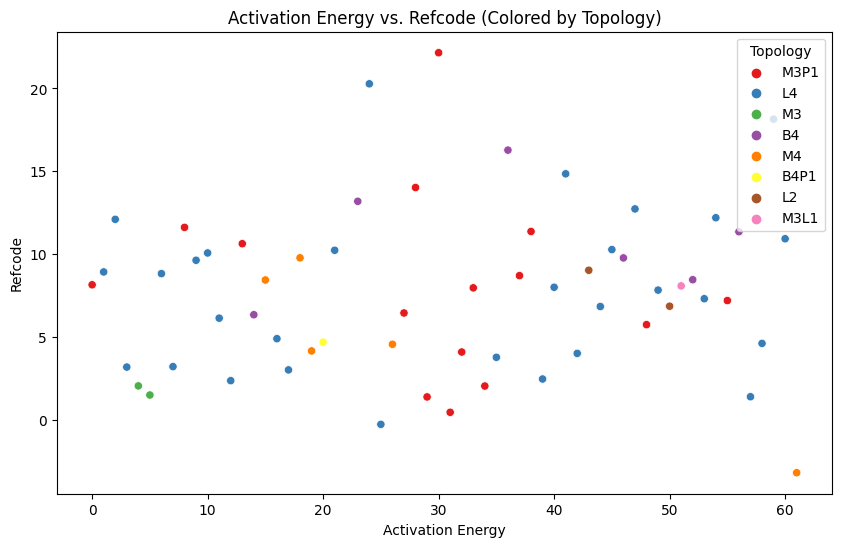

In [5]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='activation_energy', hue='ligand_topology', palette=sns.color_palette("Set1", n_colors=len(df['ligand_topology'].unique())))
plt.xlabel('Activation Energy')
plt.ylabel('Refcode')
plt.title('Activation Energy vs. Refcode (Colored by Topology)')
plt.legend(title='Topology')

plt.show()